### Analyysejä analysointiosaamisen tehtävään 2

In [1]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaavioiden tyylimäärittely
plt.style.use('seaborn-whitegrid')

# Datan avaaminen
df=pd.read_excel('https://taanila.fi/t2aineisto.xlsx')
df.head()

,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,Aktia Capital,0.069776,0.121053,-0.220341,-0.127738,0.0183,EQ_FINLAND
1,Aktia Capital K,NaN,NaN,NaN,-0.124944,0.0120,EQ_FINLAND
2,Aktia Capital L,NaN,NaN,NaN,-0.124974,0.0120,EQ_FINLAND
3,Aktia Capital X,NaN,NaN,NaN,-0.123950,0.0093,EQ_FINLAND
4,Aktia Mikro Markka A,0.112896,0.190823,-0.251177,-0.183364,0.0120,EQ_FINLAND


In [2]:
# Lyhyemmät nimet muuttujille
# df = df.drop(['Nro'], axis = 1)
df.columns=['nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [3]:
# Rastojen lukumäärä rahastoluokittain
df['rahastoluokka'].value_counts()

EQ_EUROPE         128
EQ_NORAM           81
EQ_EMER_GLOBAL     64
EQ_FINLAND         41
Name: rahastoluokka, dtype: int64

In [4]:
#Tilastolliset tunnusluvut rahastoluokittain
df.groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       51.000000   92.000000   28.000000  61.000000
           mean         0.026091    0.043126    0.075993   0.128351
           std          0.027331    0.026614    0.019041   0.037332
           min         -0.057201   -0.020057    0.032527   0.010525
           25%          0.012743    0.030534    0.064719   0.108049
           50%          0.032869    0.043371    0.069597   0.140843
           75%          0.040719    0.056743    0.088604   0.150065
           max          0.077011    0.113199    0.117090   0.212200
tuotto 3v  count       55.000000  103.000000   35.000000  64.000000
           mean         0.017238    0.056396    0.118154   0.131968
           std          0.044171    0.034801    0.027900   0.039173
           min         -0.125640   -0.042100    0.077286  -0.014385
           25%          0.002911    0.040032    0.096990   0.108774
           50%          0.021276    0.059760    0.112988   0.145398
           75%          0.039105    0.074567    0.131054   0.157393
           max          0.137801    0.156308    0.190823   0.191966
tuotto 1v  count       59.000000  118.000000   38.000000  78.000000
           mean        -0.135380   -0.084709   -0.172812   0.052481
           std          0.097997    0.082729    0.060962   0.074632
           min         -0.479298   -0.320371   -0.325645  -0.186829
           25%         -0.185663   -0.118093   -0.193834   0.030496
           50%         -0.129093   -0.063816   -0.150305   0.067500
           75%         -0.070875   -0.028222   -0.138290   0.099011
           max          0.082145    0.111630   -0.011196   0.222165
tuotto 6kk count       61.000000  124.000000   41.000000  80.000000
           mean        -0.125442   -0.087518   -0.110123   0.005850
           std          0.068035    0.057744    0.040427   0.034467
           min         -0.469831   -0.252397   -0.217748  -0.125832
           25%         -0.142740   -0.108154   -0.125005  -0.009334
           50%         -0.116559   -0.073763   -0.097541   0.003599
           75%         -0.080394   -0.047737   -0.083013   0.023577
           max         -0.047603   -0.012907   -0.040104   0.111033
palkkio    count       64.000000  128.000000   41.000000  81.000000
           mean         0.014025    0.011478    0.011699   0.011557
           std          0.007113    0.005942    0.005941   0.006102
           min          0.000000    0.000000    0.001590   0.000000
           25%          0.008000    0.007500    0.006200   0.006000
           50%          0.015000    0.011600    0.012000   0.015000
           75%          0.019000    0.017350    0.017000   0.017500
           max          0.025000    0.020000    0.020000   0.020000

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 5v'>

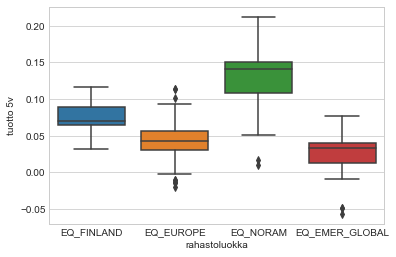

In [5]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 3v'>

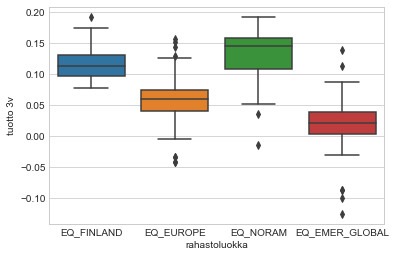

In [6]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 1v'>

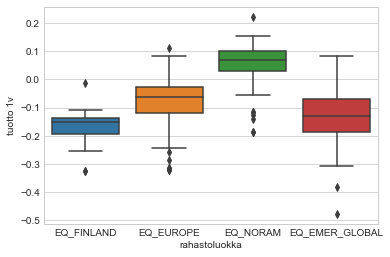

In [7]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 6kk'>

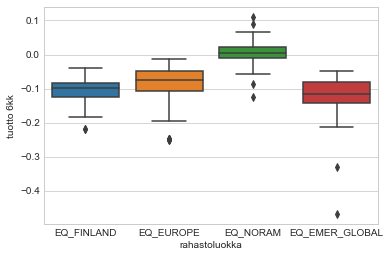

In [8]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='palkkio'>

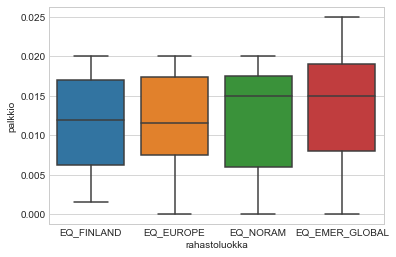

In [9]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [10]:
# Korrelaatiokertoimen 1v tuoton ja palkkion välille rahastoluokittain
df.groupby('rahastoluokka')[['tuotto 1v','palkkio']].corr()

tuotto 1v   palkkio
rahastoluokka                                
EQ_EMER_GLOBAL tuotto 1v   1.000000  0.009096
               palkkio     0.009096  1.000000
EQ_EUROPE      tuotto 1v   1.000000 -0.338888
               palkkio    -0.338888  1.000000
EQ_FINLAND     tuotto 1v   1.000000 -0.401648
               palkkio    -0.401648  1.000000
EQ_NORAM       tuotto 1v   1.000000 -0.195564
               palkkio    -0.195564  1.000000

In [11]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.4f' %p)

EQ_FINLAND korrelaatio -0.402, p-arvo 0.0124
EQ_EUROPE korrelaatio -0.339, p-arvo 0.0002
EQ_NORAM korrelaatio -0.196, p-arvo 0.0862
EQ_EMER_GLOBAL korrelaatio 0.009, p-arvo 0.9455


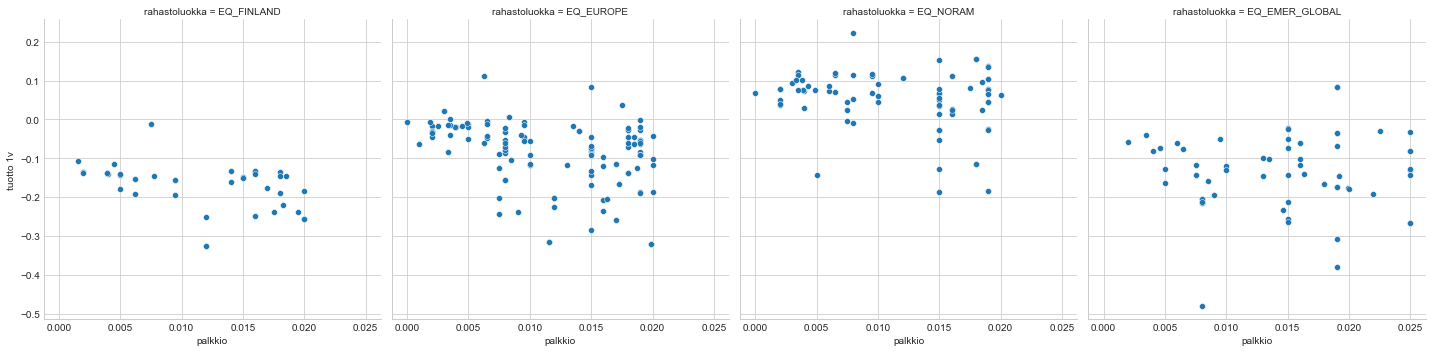

In [12]:
sns.relplot(x='palkkio', y='tuotto 1v', col='rahastoluokka', data=df, kind='scatter')